## Final Project Submission

Please fill out:
* Student name: Cody Hoffman
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL:


# Always start with the imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm


from sklearn.preprocessing import MinMaxScaler

import warnings

### Here I import the dataset we use for this project and start to explore it

In [3]:
dataset = pd.read_csv("kc_house_data.csv")

In [4]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### DATA CLEANING
### I needed to check the data to make sure it was entirely numeric.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Starting with the date I turned it into datetime from it's original object type.

In [6]:
dataset.date = pd.to_datetime(dataset.date)

#### I also needed to change sqft basement. I opted to change all ? into 0.0, indicating no basement as most listings didn't have one.

In [7]:
dataset.sqft_basement = dataset.sqft_basement.map(lambda x: '0' if x == '?' else x)
dataset.sqft_basement = dataset.sqft_basement.astype('float')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

#### Continuing on with the scrubbing it was time to find and clean the null values.

In [9]:
dataset.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
dataset.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.321108,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.297229,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.278485,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.428660,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,0.088213,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,0.271689,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


#### I changed the null values to 0, indicating not waterfront nor having a view and set the data type to int as it is categorical data.

In [11]:
dataset.loc[dataset.waterfront.isna(), 'waterfront'] = 0
dataset.waterfront = dataset.waterfront.astype('int')

In [12]:
dataset.loc[dataset.view.isna(), 'view'] = 0
dataset.view = dataset.view.astype('int')

#### Years renovated has extremely low correlation so I simply set all null values to 0.

In [13]:
dataset.loc[dataset.yr_renovated.isna(), 'yr_renovated'] = 0

#### We want to avoid multicollinearity so I used aheatmap to easily spot categories that had too strong of a correlation.
With this I chose to drop sqft_above

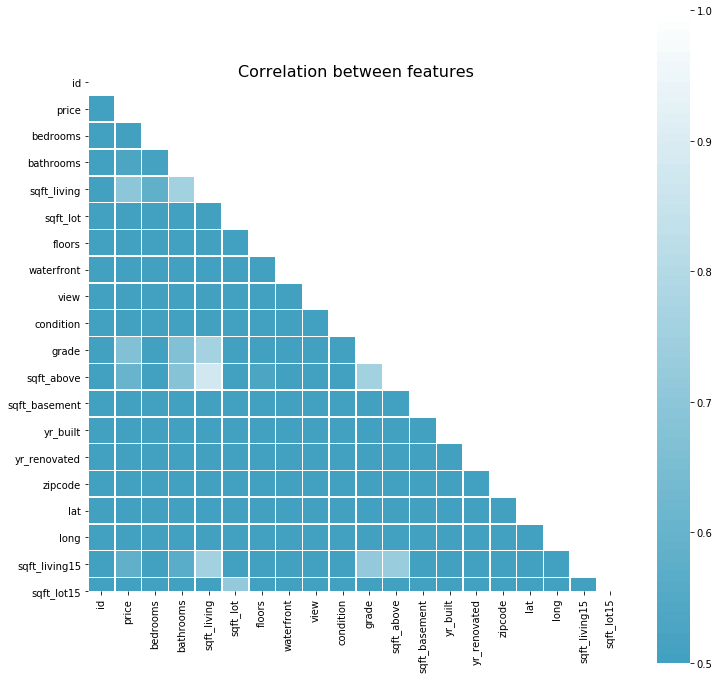

In [14]:
plt.figure(figsize=(12,12))
# Compute the correlation matrix
corr = dataset.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0, vmin=0.5, square=True, linewidths=.5, cmap='ocean')
plt.title('Correlation between features', fontdict={'fontsize': 16})
plt.show()

In [15]:
dataset.drop('sqft_above', axis=1, inplace=True)

### DATA EXPLORATION

#### I start by looking at the changes in price of houses sold multiple times.

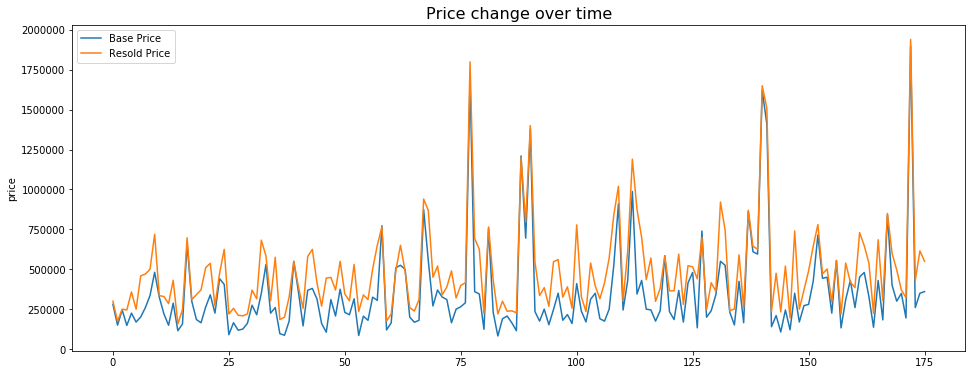

Price increase after renovation: 28 %


In [16]:
dup = dataset[ dataset.id.duplicated(keep=False) ]
prices = dup.groupby('id')['price']

plt.figure(figsize=(16,6))
sns.lineplot( range(len(prices)), prices.first(), label='Base Price' )
sns.lineplot( range(len(prices)), prices.last(), label='Resold Price' )
plt.title('Price change over time', fontdict={'fontsize': 16})
plt.legend()
plt.show()

print('Price increase after renovation:',round( ( 1 - ( prices.first().mean() / prices.last().mean() ) ) * 100 ),'%' )

In [17]:
dataset.drop(['id','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [18]:
decades = np.linspace(1900, 2016, 30, dtype='int')
count = []
for i in range(0,29):
    count.append(len(dataset[(dataset.yr_built >= decades[i]) & (dataset.yr_built <= decades[i+1])]))

In [19]:
df = dataset

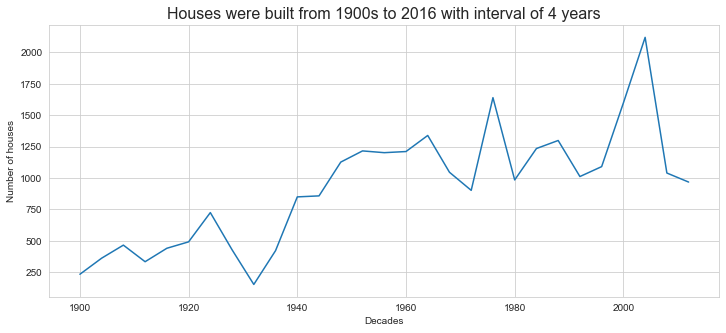

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.lineplot(decades[:-1], count)
plt.title('Houses were built from 1900s to 2016 with interval of 4 years', fontdict={'fontsize': 16})
plt.xlabel('Decades')
plt.ylabel('Number of houses')
plt.show()

#### What time of year is best to sell a house.

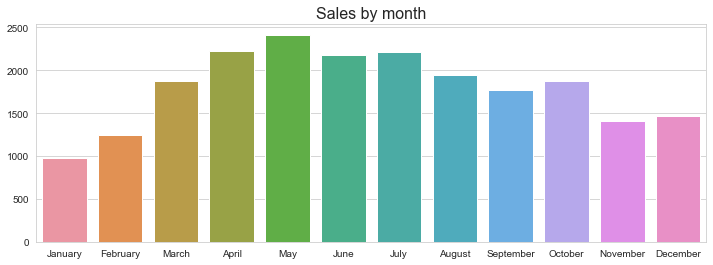

In [21]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(df.date.dt.month == i))
    
plt.figure(figsize=(12,4))
sns.barplot(months, monthly_sales)
plt.title('Sales by month', fontdict={'fontsize': 16})
plt.show()

#### Days most likely to close on a house.

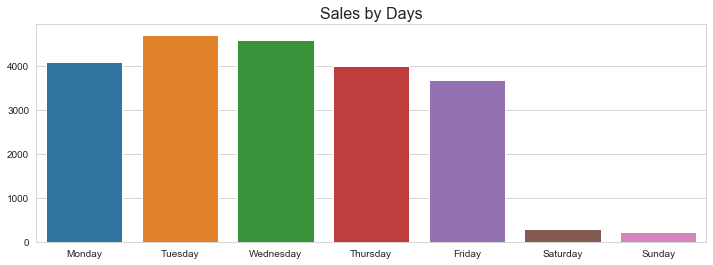

In [22]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_sales = []

for i in range(0,7):
    daily_sales.append(sum(df.date.dt.dayofweek == i))

plt.figure(figsize=(12,4))
sns.barplot(day_of_week,daily_sales)
plt.title('Sales by Days', fontdict={'fontsize': 16})
plt.show()

In [23]:
df.drop('date', axis=1, inplace=True)

#### Correlation between sale price and house size.

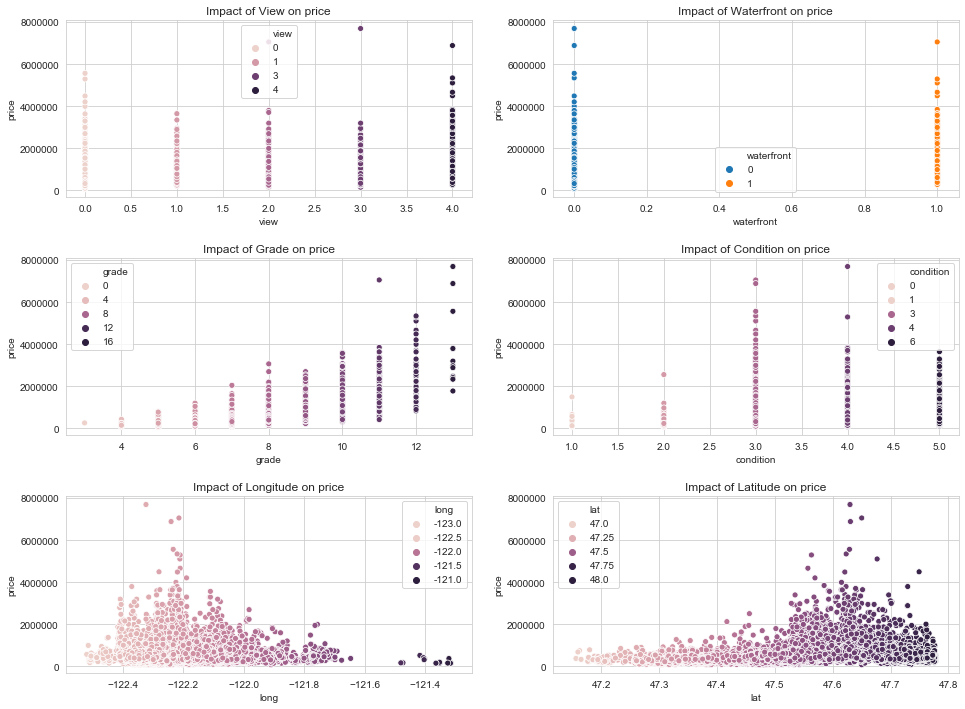

In [24]:
plt.figure(figsize=(16,12))

plt.subplot(321)
sns.scatterplot(df.view, df.price, hue=df.view)
plt.title('Impact of View on price')
plt.subplot(322)
sns.scatterplot(df.waterfront, df.price, hue=df.waterfront)
plt.title('Impact of Waterfront on price')
plt.subplot(323)
sns.scatterplot(df.grade, df.price, hue=df.grade)
plt.title('Impact of Grade on price')
plt.subplot(324)
sns.scatterplot(df.condition, df.price, hue=df.condition)
plt.title('Impact of Condition on price')
plt.subplot(325)
sns.scatterplot(df.long, df.price, hue=df.long)
plt.title('Impact of Longitude on price')
plt.subplot(326)
sns.scatterplot(df.lat, df.price, hue=df.lat)
plt.title('Impact of Latitude on price')

plt.subplots_adjust(hspace=0.35)
plt.show()

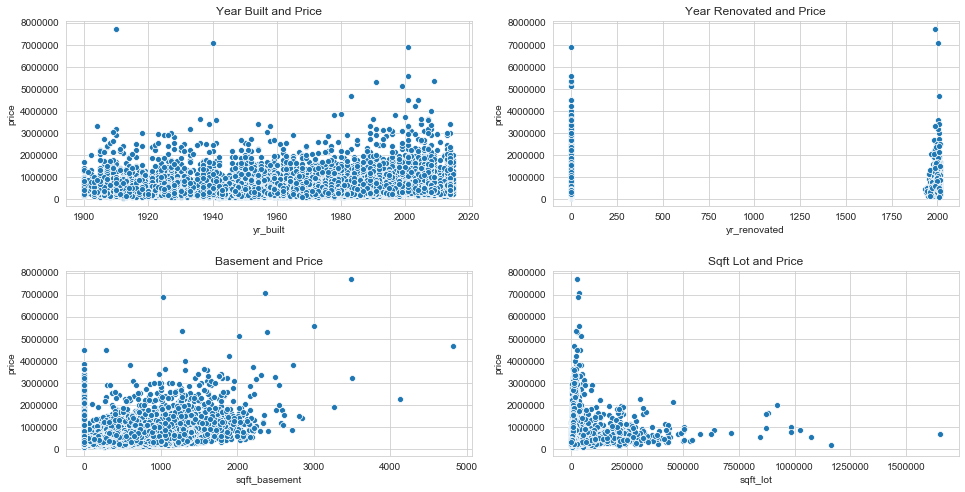

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.scatterplot(df.yr_built, df.price)
plt.title('Year Built and Price')
plt.subplot(222)
sns.scatterplot(df.yr_renovated, df.price)
plt.title('Year Renovated and Price')
plt.subplot(223)
sns.scatterplot(df.sqft_basement, df.price)
plt.title('Basement and Price')
plt.subplot(224)
sns.scatterplot(df.sqft_lot, df.price)
plt.title('Sqft Lot and Price')

plt.subplots_adjust(hspace=0.35)
plt.show()

#### So what actually impacts the sale price?

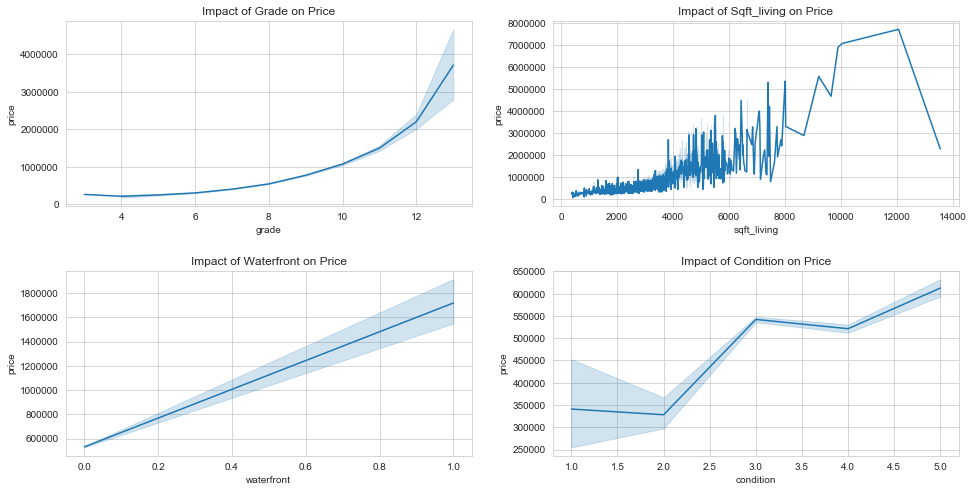

In [26]:
plt.figure(figsize=(16,8))

plt.subplot(221)
sns.lineplot(df.grade, df.price)
plt.title('Impact of Grade on Price')
plt.subplot(222)
sns.lineplot(df.sqft_living, df.price)
plt.title('Impact of Sqft_living on Price')
plt.subplot(223)
sns.lineplot(df.waterfront, df.price)
plt.title('Impact of Waterfront on Price')
plt.subplot(224)
sns.lineplot(df.condition, df.price)
plt.title('Impact of Condition on Price')

plt.subplots_adjust(hspace=0.35)
plt.show()

#### How does the location impact the sale price?

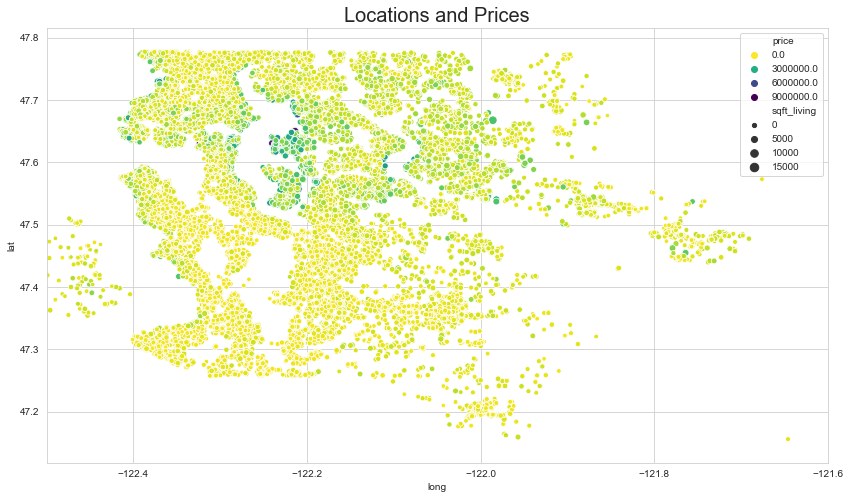

In [27]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.price, size=df.sqft_living, palette='viridis_r')
plt.xlim(-122.5, -121.6)
plt.title('Locations and Prices', fontdict={'fontsize': 20})
plt.show()

#### Time to search for and eliminate outliers.

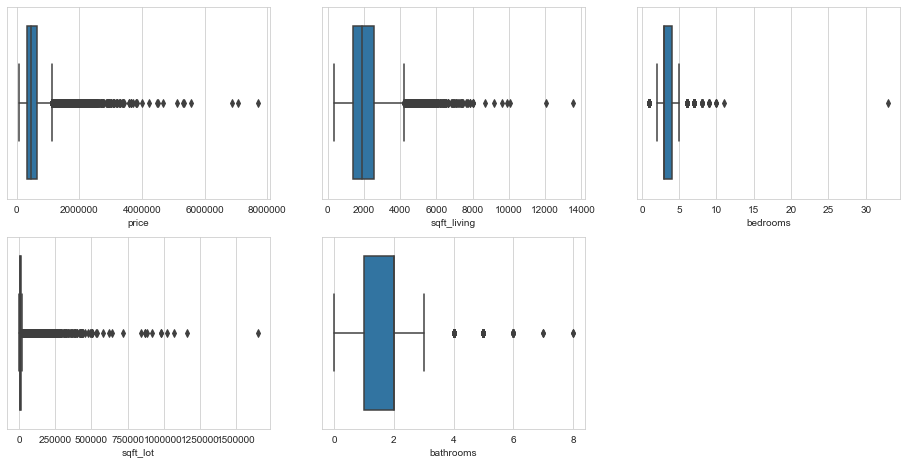

In [28]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.sqft_living)
plt.subplot(333)
sns.boxplot(df.bedrooms)
plt.subplot(334)
sns.boxplot(df.sqft_lot)
plt.subplot(335)
sns.boxplot(df.bathrooms.astype('int'))

In [29]:
print('Original dataset:',len(df))
# Removing outliers from dataset
df = df[df.price < 4000000]
df = df[df.sqft_living < 8000]
df = df[df.sqft_lot < 500000]
df = df[df.bedrooms < 5]
df = df[df.bathrooms < 4]
print('After removing outliers:',len(df))

Original dataset: 21597
After removing outliers: 19469


#### Setting up categories.

In [30]:
bins = [ -1 , 1 , df.sqft_basement.max() ]
labels = ['0','1']

df.sqft_basement = pd.cut(df.sqft_basement, bins, labels=labels)
df.sqft_basement = df.sqft_basement.astype('category')
sqft_basement = pd.get_dummies(df.sqft_basement, prefix='basement', drop_first=True)
df = df.join([sqft_basement])
df.drop(['sqft_basement'], axis=1, inplace=True)

In [31]:
bins = [ -1 , 1 , df.yr_renovated.max() ]
labels = ['0','1']

df.yr_renovated = pd.cut(df.yr_renovated, bins, labels=labels)
df.yr_renovated = df.yr_renovated.astype('category')
yr_renovated = pd.get_dummies(df.yr_renovated, prefix='renovated', drop_first=True)
df = df.join([yr_renovated])
df.drop(['yr_renovated'], axis=1, inplace=True)

In [32]:
df.waterfront = df.waterfront.astype('category')
df.view = df.view.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.zipcode = df.zipcode.astype('category')
df.bedrooms = df.bedrooms.astype('category')
df.floors = df.floors.astype('category')
df.bathrooms = df.bathrooms.astype('int').astype('category')
df.yr_built = df.yr_built.astype('category')

waterfront = pd.get_dummies(df.waterfront, prefix='waterfront', drop_first=True)
view = pd.get_dummies(df.view, prefix='view', drop_first=True)
condition = pd.get_dummies(df.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(df.grade, prefix='grade', drop_first=True)
zipcode = pd.get_dummies(df.zipcode, prefix='zipcode', drop_first=True)
bedrooms = pd.get_dummies(df.bedrooms, prefix='bedrooms', drop_first=True)
floors = pd.get_dummies(df.floors, prefix='floors', drop_first=True)
bathrooms = pd.get_dummies(df.bathrooms, prefix='bathrooms', drop_first=True)
yr_built = pd.get_dummies(df.yr_built, prefix='yr_built', drop_first=True)

# Adding dummies to the dataset and removing original features
df = df.join([waterfront, view, condition, grade, zipcode, bedrooms, floors, yr_built, bathrooms])
df.drop(['waterfront','view','condition','grade','zipcode','bedrooms', 'floors', 'yr_built', 'bathrooms'], axis=1, inplace=True)

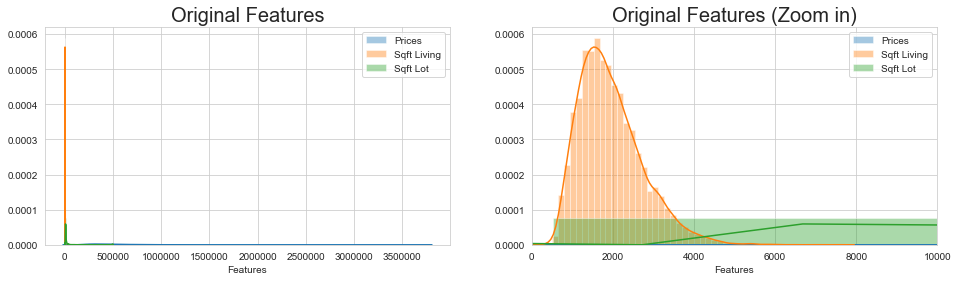

In [33]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(df.price, label='Prices')
sns.distplot(df.sqft_living, label='Sqft Living')
sns.distplot(df.sqft_lot, label='Sqft Lot')
plt.title('Original Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()

plt.subplot(122)
sns.distplot(df.price, label='Prices')
sns.distplot(df.sqft_living, label='Sqft Living')
sns.distplot(df.sqft_lot, label='Sqft Lot')
plt.title('Original Features (Zoom in)', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.xlim(0, 10000)
plt.legend()
plt.show()

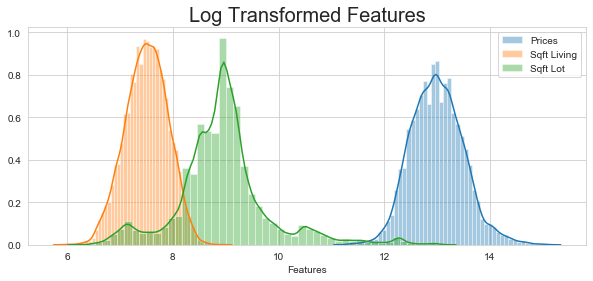

In [34]:
# Perform logariphmic transformation
price = np.log(df.price)
sqft_living = np.log(df.sqft_living)
sqft_lot = np.log(df.sqft_lot)

# Display
plt.figure(figsize=(10,4))
sns.distplot(price, label='Prices')
sns.distplot(sqft_living, label='Sqft Living')
sns.distplot(sqft_lot, label='Sqft Lot')

plt.title('Log Transformed Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

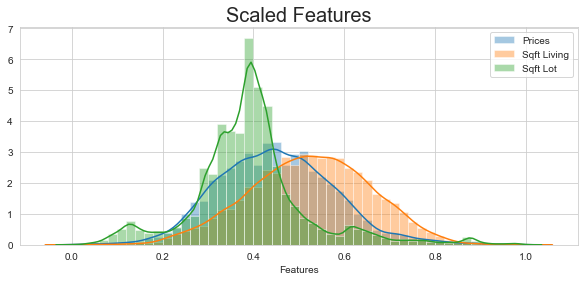

In [35]:
# Performing Min Max Scaling by hand

df['price'] = ( price - min(price) ) / ( max(price) - min(price) )
df['sqft_living'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )
df['sqft_lot'] = ( sqft_lot - min(sqft_lot) ) / ( max(sqft_lot) - min(sqft_lot) )

# Display
plt.figure(figsize=(10,4))
sns.distplot(df.price, label='Prices')
sns.distplot(df.sqft_living, label='Sqft Living')
sns.distplot(df.sqft_lot, label='Sqft Lot')
plt.title('Scaled Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

#### Building a linear regression model.

In [36]:
# This is set of function for performing linear regression and validating results
def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    # Errors
    print('R^2 Score:',round(linreg.score(X, y),2))
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))
    print('-----------------------------------')
    print('Average Predicted Price:', round(y_pred.mean(),4))
    print('Average Actual Price:', round(y_test.mean(), 4))
    
    # Visualization of selection of 100 house prices
    plt.figure(figsize=(16,6))
    sns.lineplot(range(len(y_pred[:200])), y_pred[:200], label='Predicted Prices')
    sns.lineplot(range(len(y_pred[:200])), y_test[:200], label='Actual Prices')
    plt.title('Comparing predicted price vs actual price', fontdict={'fontsize': 20}), plt.xlabel('Values'), plt.ylabel('Prices')
    plt.legend(), plt.show()
    return (linreg, y_pred, y_test)

def cross_validation(X, y, cv=15, show_scores=False):
    score = cross_val_score(linreg, X, y, cv=cv, scoring="r2")
    print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')
    print(score) if show_scores else False
    
def feature_selection(X, y):
    est = sm.OLS(y, X).fit()
    pvalues = pd.DataFrame(est.pvalues, columns=['p'])
    features = list(pvalues[pvalues.p < 0.05].index)
    return features

R^2 Score: 0.88
Mean Absolute Error: 0.03381
Root Mean Squared Error: 0.04607
-----------------------------------
Average Predicted Price: 0.4495
Average Actual Price: 0.4502


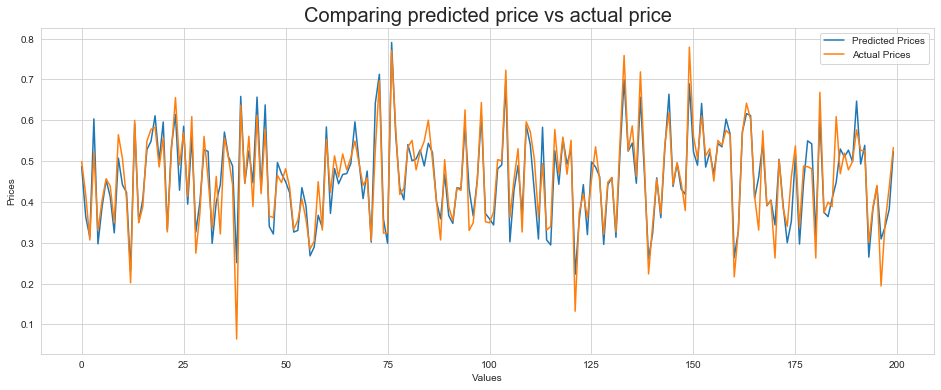

In [37]:
X = df.drop(['price'],axis=1)
y = df.price

linreg, y_pred, y_test = linear_regression(X, y)

#### Validation

In [38]:
cross_validation(X, y, cv=15, show_scores=True)

Model Accuracy: -3.786478817823397e+20 %
[ 8.69797993e-01  8.79580234e-01 -5.67971823e+19  8.62634087e-01
  8.84430232e-01  8.61144979e-01  8.56637038e-01  8.71959728e-01
  8.60653104e-01  8.70556215e-01  8.71211215e-01  8.80232936e-01
  8.72900178e-01  8.79845889e-01  8.90441674e-01]


#### Our model performed poorly so let's try some feature selection.

In [39]:
significant_features = feature_selection(X, y)
print('Significant features:',len(significant_features),'\nAll features:',len(X.columns))

Significant features: 144 
All features: 220


R^2 Score: 0.86
Mean Absolute Error: 0.03521
Root Mean Squared Error: 0.04828
-----------------------------------
Average Predicted Price: 0.4513
Average Actual Price: 0.4499


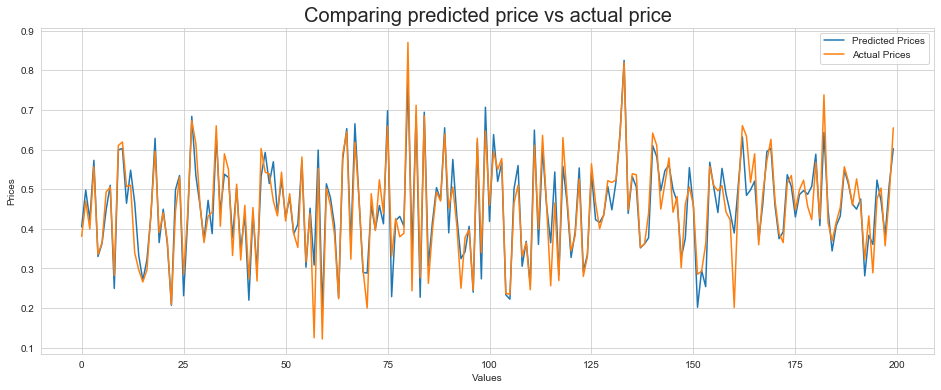

In [40]:
X = df[significant_features]
y = df.price
linreg, y_pred, y_test = linear_regression(X, y)

In [41]:
cross_validation(X, y, cv=5)

Model Accuracy: 86.0 %


#### Features with the greatest impact.

In [42]:
features = pd.DataFrame(linreg.coef_, index=significant_features, columns=['Features'])
features.sort_values(by='Features', ascending=False).head()

,Features
sqft_living,0.397030
zipcode_98039,0.350853
zipcode_98004,0.309037
zipcode_98112,0.287573
zipcode_98102,0.275014


#### Conclusion
After making necessary cleaning and modification of our data, model performs with 87% accuracy accross all of our data.

We selected important features and rejected the ones that can negatively impact result of the prediction.

Location and size of the house have biggest impact on house price.